## Genetic Algorithm for the Traveling Salesman Problem

Generation 0: Best distance = 25957.23
Generation 100: Best distance = 11065.95
Generation 200: Best distance = 9022.73
Generation 300: Best distance = 8140.24
Generation 400: Best distance = 7917.15
Generation 500: Best distance = 7852.14
Generation 600: Best distance = 7841.10
Generation 700: Best distance = 7841.10
Generation 800: Best distance = 7841.10
Generation 900: Best distance = 7841.10
Generation 1000: Best distance = 7841.10
Generation 1100: Best distance = 7841.10
Generation 1200: Best distance = 7841.10
Generation 1300: Best distance = 7841.10
Generation 1400: Best distance = 7841.10
Generation 1500: Best distance = 7841.10
Generation 1600: Best distance = 7841.10
Generation 1700: Best distance = 7841.10
Generation 1800: Best distance = 7841.10
Generation 1900: Best distance = 7841.10
Generation 2000: Best distance = 7841.10
Generation 2100: Best distance = 7841.10
Generation 2200: Best distance = 7841.10
Generation 2300: Best distance = 7841.10
Generation 2400: Best dist

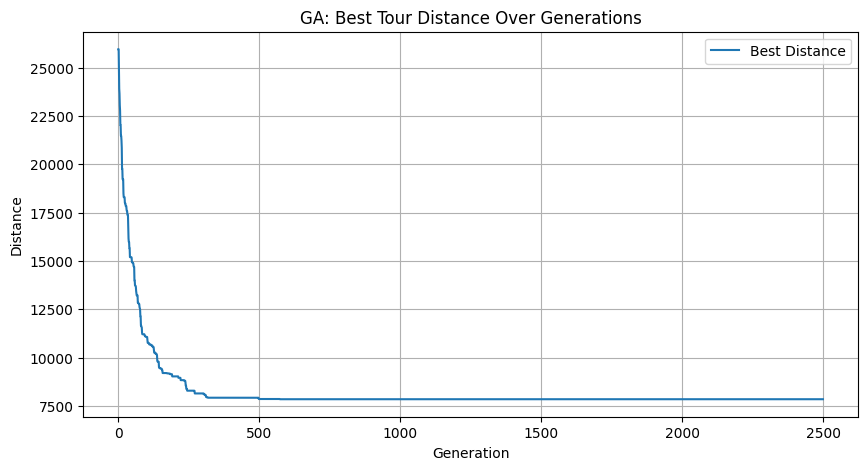

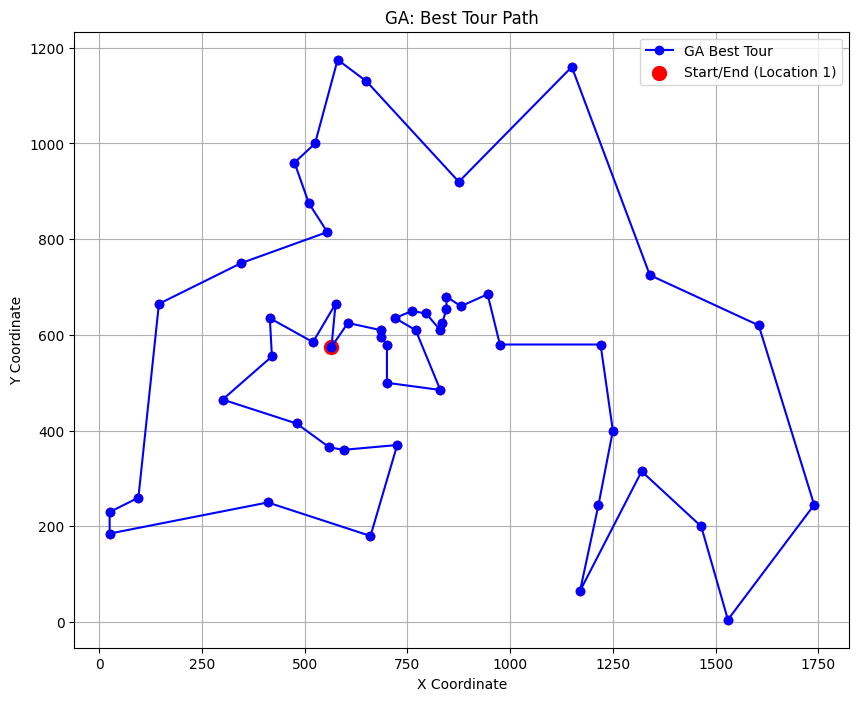

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def read_tsp_file(file_path):
    coordinates = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        start = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start = True
                continue
            if line.strip() == "EOF":
                break
            if start:
                _, x, y = line.strip().split()
                coordinates.append((float(x), float(y)))
    return coordinates

def calculate_distance_matrix(coordinates):
    n = len(coordinates)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i][j] = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + (coordinates[i][1] - coordinates[j][1])**2)
    return dist_matrix

def total_distance(tour, dist_matrix):
    distance = 0
    for i in range(len(tour) - 1):
        distance += dist_matrix[tour[i]][tour[i+1]]
    distance += dist_matrix[tour[-1]][tour[0]] # return to start 
    return distance

# Genetic Algorithm Starts
def initialize_population(pop_size, n_cities):
    population = []
    for _ in range(pop_size):
        individual = list(range(1, n_cities))  # index 2 to 52 because 1 is fixed
        random.shuffle(individual)
        population.append(individual)
    return population

def fitness(individual, dist_matrix):
    tour = [0] + individual + [0]  # start and end at location 1 
    return 1 / total_distance(tour, dist_matrix)

def select_highest_fitness(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0]

def order_crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    offspring = [None] * len(parent1)
    offspring[start:end+1] = parent1[start:end+1]
    p2_elements = [item for item in parent2 if item not in offspring[start:end+1]]
    p2_index = 0
    for i in range(len(offspring)):
        if offspring[i] is None:
            offspring[i] = p2_elements[p2_index]
            p2_index += 1
    return offspring

def swap_cities(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

# Adding inversion mutation to detailed explore the search space
def inverse_city_swap(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = sorted(random.sample(range(len(individual)), 2))
        individual[i:j+1] = reversed(individual[i:j+1])
    return individual

def genetic_algorithm(dist_matrix, coordinates, pop_size=100, generations=2500, crossover_rate=0.8, mutation_rate=0.15, elitism_ratio=0.05):
    '''
        dist_matrix -> distance in between two cities
        coordinates -> coordinates of cities (x1,y1) (x2,y2)
        pop_size -> population size for each generation
        generations -> number of generations to run the algorithm
        here the maximum fitness = pop_size * generations
        crossover_rate -> probability of crossover in between two location
        mutation_rate -> probability of swapping in between two location 
        elitism_ratio -> ratio of best location to be selected for next generation like elite member of any organization
    '''
    n_cities = len(dist_matrix)
    population = initialize_population(pop_size, n_cities)
    best_distances = []
    best_tour = None
    best_dist = float('inf')

    elitism_count = int(elitism_ratio * pop_size)

    for gen in range(generations):
        fitnesses = [fitness(ind, dist_matrix) for ind in population]
        new_population = []

        # Preserve elite individuals
        best_idx = np.argmax(fitnesses)
        best_individual = population[best_idx]
        new_population.append(best_individual)

        while len(new_population) < pop_size:
            parent1 = select_highest_fitness(population, fitnesses)
            parent2 = select_highest_fitness(population, fitnesses)

            if random.random() < crossover_rate:
                offspring = order_crossover(parent1, parent2)
            else:
                offspring = parent1.copy()

            offspring = inverse_city_swap(offspring, mutation_rate)
            offspring = swap_cities(offspring, mutation_rate)

            new_population.append(offspring)

        population = new_population
        best_fitness = max(fitnesses)
        current_best_dist = 1 / best_fitness
        best_distances.append(current_best_dist)

        if current_best_dist < best_dist:
            best_dist = current_best_dist
            best_tour = [0] + population[best_idx] + [0]

        if gen % 100 == 0:
            print(f"Generation {gen}: Best distance = {current_best_dist:.2f}")

    return best_distances, best_tour, best_dist

# Main
coordinates = read_tsp_file("F:/MDU/DVA340/Berlin52.tsp")
dist_matrix = calculate_distance_matrix(coordinates)
best_distances_ga, best_tour_ga, best_dist_ga = genetic_algorithm(dist_matrix, coordinates)

print("\nGA Best Path (Location IDs):", [id + 1 for id in best_tour_ga])
print(f"GA Best Distance: {best_dist_ga:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(best_distances_ga, label='Best Distance')
plt.title("GA: Best Tour Distance Over Generations")
plt.xlabel("Generation")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
x = [coordinates[i][0] for i in best_tour_ga]
y = [coordinates[i][1] for i in best_tour_ga]
plt.plot(x, y, 'b-o', label='GA Best Tour')
plt.scatter(x, y, c='red')
plt.scatter(coordinates[0][0], coordinates[0][1], c='Red', s=100, edgecolor='Red', label='Start/End (Location 1)')
plt.title("GA: Best Tour Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()

## Ant Colony Optimization for the Traveling Salesman Problem

C:\Users\sarba\AppData\Local\Temp\ipykernel_9252\1838645828.py:76: RuntimeWarning: divide by zero encountered in divide
  heuristic_matrix = np.where(dist_matrix > 0, (1 / dist_matrix) ** beta, 0)


Generation 0: Best distance = 8112.46
Generation 100: Best distance = 7908.87
Generation 200: Best distance = 7908.87
Generation 300: Best distance = 7908.87
Generation 400: Best distance = 7908.87

ACO Best Path (Location IDs): [1, 22, 49, 32, 36, 35, 34, 39, 40, 38, 37, 48, 24, 5, 15, 6, 4, 25, 12, 28, 27, 26, 47, 13, 14, 52, 11, 51, 33, 43, 10, 9, 8, 41, 19, 45, 3, 18, 31, 21, 17, 42, 7, 2, 30, 23, 20, 50, 29, 16, 44, 46, 1]
ACO Best Distance: 7908.87


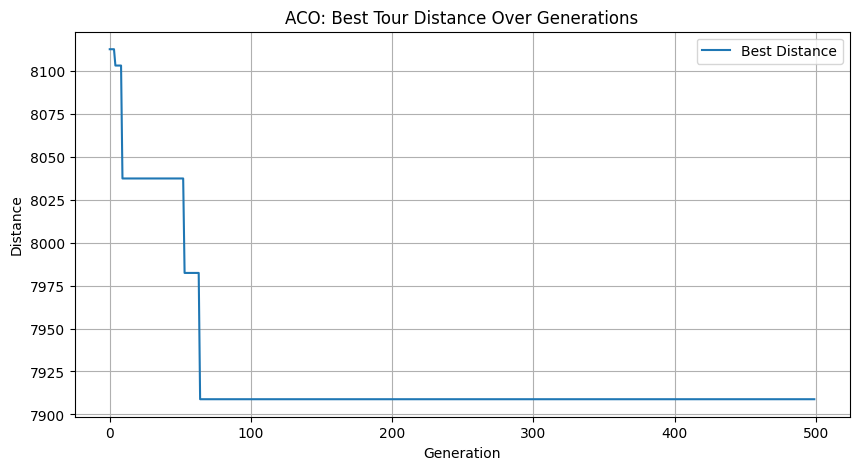

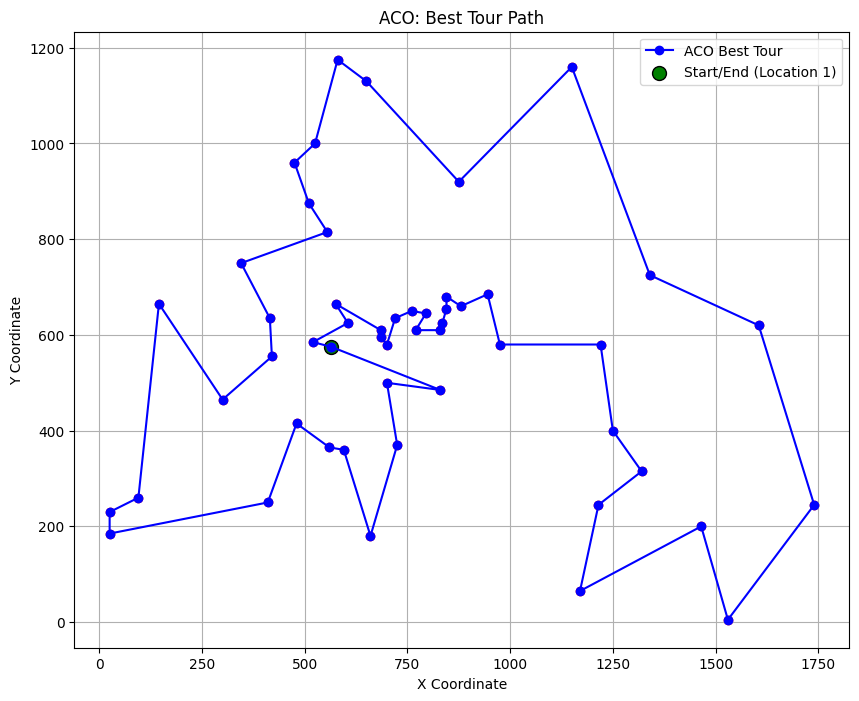

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def read_tsp_file(file_path):
    coords = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        start = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start = True
                continue
            if line.strip() == "EOF":
                break
            if start:
                _, x, y = line.strip().split()
                coords.append((float(x), float(y)))
    return coords

def calculate_distance_matrix(coords):
    n = len(coords)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i][j] = np.sqrt((coords[i][0] - coords[j][0])**2 + (coords[i][1] - coords[j][1])**2)
    return dist_matrix

def total_distance(tour, dist_matrix):
    distance = 0
    for i in range(len(tour) - 1):
        distance += dist_matrix[tour[i]][tour[i + 1]]
    distance += dist_matrix[tour[-1]][tour[0]]  # Return to start
    return distance

def initialize_ant_pheromone(n_cities):
    return np.ones((n_cities, n_cities)) * 0.1

def update_pheromone(pheromone, delta_pheromone, rho=0.1):
    pheromone = (1 - rho) * pheromone + delta_pheromone #adjust value after each iteration
    pheromone = np.clip(pheromone, 0.1, 1.0)  # avoid extreme values
    return pheromone

def ant_colony_optimization(dist_matrix, coords, pop_size=500, generations=500, alpha=1, beta=2, rho=0.1, q0=0.9):
    """
    - dist_matrix-> Distance matrix between cities
    - coords-> List of (x, y) coordinates
    - pop_size-> Number of ants
    - generations-> Maximum number of iterations
    - here 500*500 = 250000 given
    - alpha-> Pheromone influence
    - beta-> Heuristic influence
    - rho-> Pheromone evaporation rate
    - q0-> Exploitation probability
    
    Returns->
    - best_distances-> List of best distances per generation
    - best_tour-> Best tour found
    - best_dist-> Distance of the best tour
    """
    n_cities = len(dist_matrix)
    pheromone = initialize_ant_pheromone(n_cities)
    heuristic_matrix = np.where(dist_matrix > 0, (1 / dist_matrix) ** beta, 0) # for increasing speed of the evaluation
    best_tour = None
    best_dist = float('inf')
    best_distances = []

    for gen in range(generations):
        all_ants_tours = []
        all_ants_distances = []

        for _ in range(pop_size):
            visited = np.zeros(n_cities, dtype=bool)
            visited[0] = True  # Start at city 1 index 0
            current_city = 0
            tour = [current_city]
            for _ in range(n_cities - 1):
                unvisited = np.where(~visited)[0]
                products = (pheromone[current_city][unvisited] ** alpha) * heuristic_matrix[current_city][unvisited]
                if random.random() < q0:
                    next_city_index = np.argmax(products)
                else:
                    probabilities = products / products.sum()
                    next_city_index = np.random.choice(len(unvisited), p=probabilities)
                next_city = unvisited[next_city_index]
                tour.append(next_city)
                visited[next_city] = True
                current_city = next_city

            all_ants_tours.append(tour)
            tour_distance = total_distance(tour, dist_matrix)
            all_ants_distances.append(tour_distance)

            if tour_distance < best_dist:
                best_dist = tour_distance
                best_tour = tour.copy()

        delta_pheromone = np.zeros_like(pheromone)
        for distance, tour in zip(all_ants_distances, all_ants_tours):
            for i in range(n_cities):
                next_i = (i + 1) % n_cities
                delta_pheromone[tour[i]][tour[next_i]] += 1 / distance

        pheromone = update_pheromone(pheromone, delta_pheromone, rho)
        best_distances.append(best_dist)

        if gen % 100 == 0:
            print(f"Generation {gen}: Best distance = {best_dist:.2f}")

    return best_distances, best_tour, best_dist

# Main execution
if __name__ == "__main__":
    file_path = "F:/MDU/DVA340/Berlin52.tsp" 
    coords = read_tsp_file(file_path)
    dist_matrix = calculate_distance_matrix(coords)
    best_distances_aco, best_tour_aco, best_dist_aco = ant_colony_optimization(dist_matrix, coords)
    print("\nACO Best Path (Location IDs):", [id + 1 for id in best_tour_aco] + [best_tour_aco[0] + 1])
    print(f"ACO Best Distance: {best_dist_aco:.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(best_distances_aco, label='Best Distance')
    plt.title("ACO: Best Tour Distance Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Distance")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 8))
    x = [coords[i][0] for i in best_tour_aco]
    y = [coords[i][1] for i in best_tour_aco]
    plt.plot(x + [x[0]], y + [y[0]], 'b-o', label='ACO Best Tour')  # Close the loop
    plt.scatter(x, y, c='red')
    plt.scatter(coords[0][0], coords[0][1], c='red', s=100, edgecolor='Red', label='Start/End (Location 1)')
    plt.title("ACO: Best Tour Path")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()
